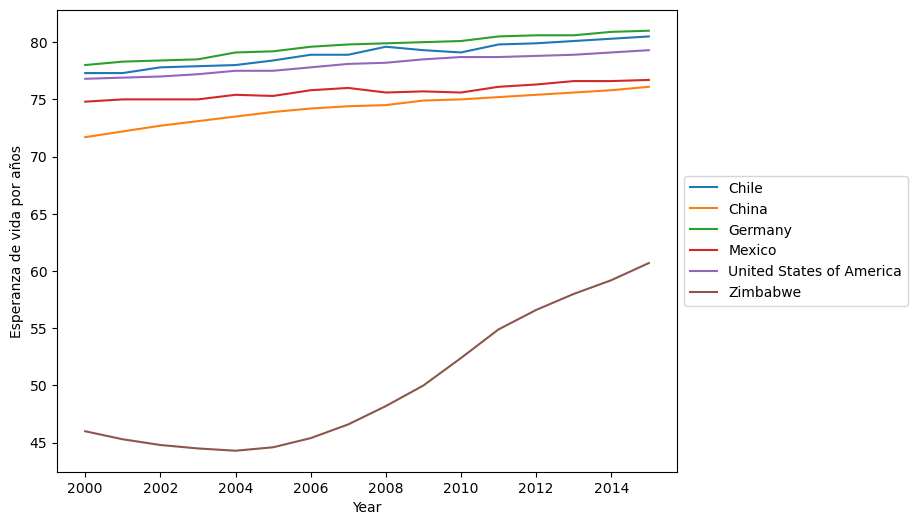

<Figure size 640x480 with 0 Axes>

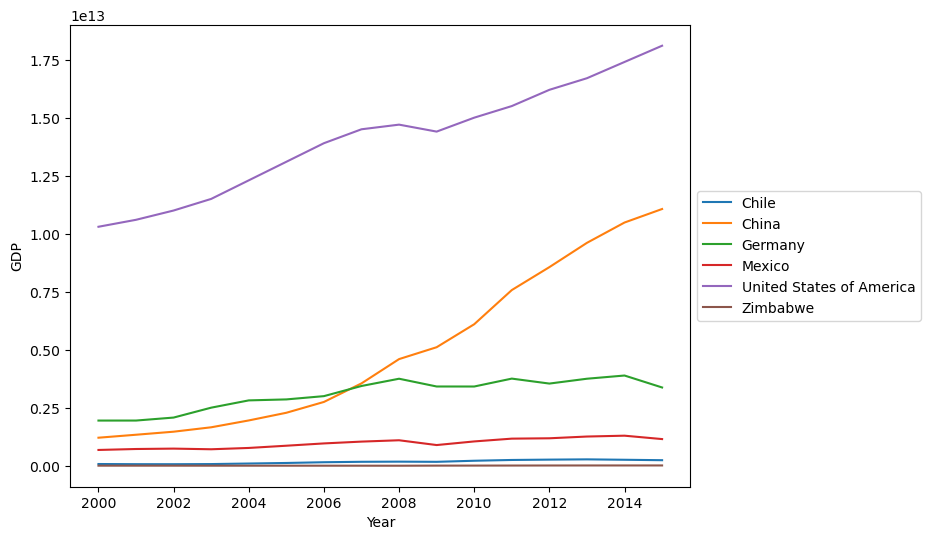

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

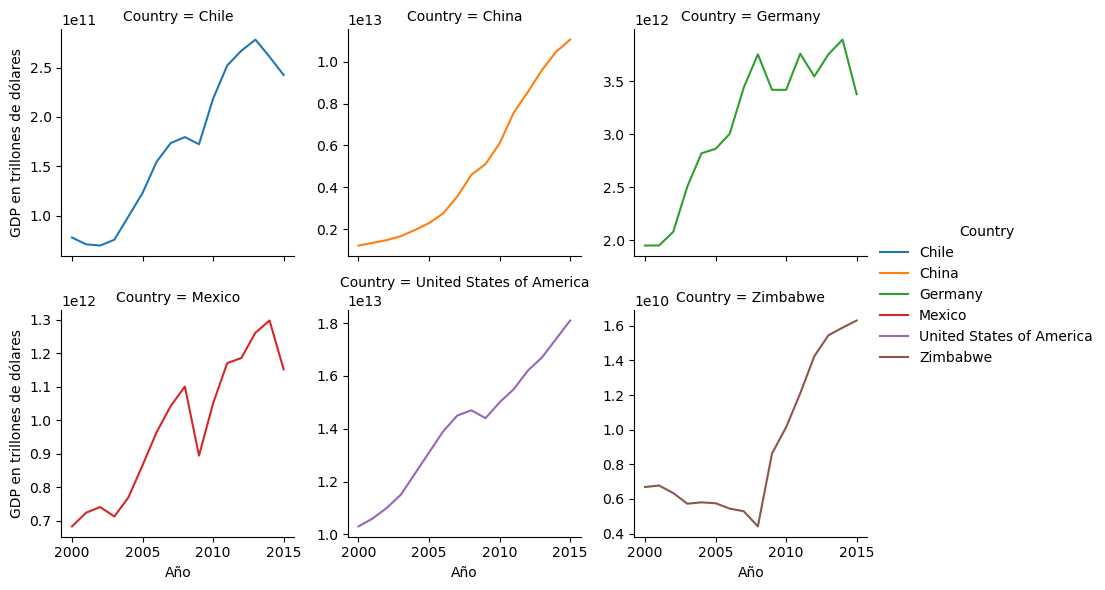

<Figure size 640x480 with 0 Axes>

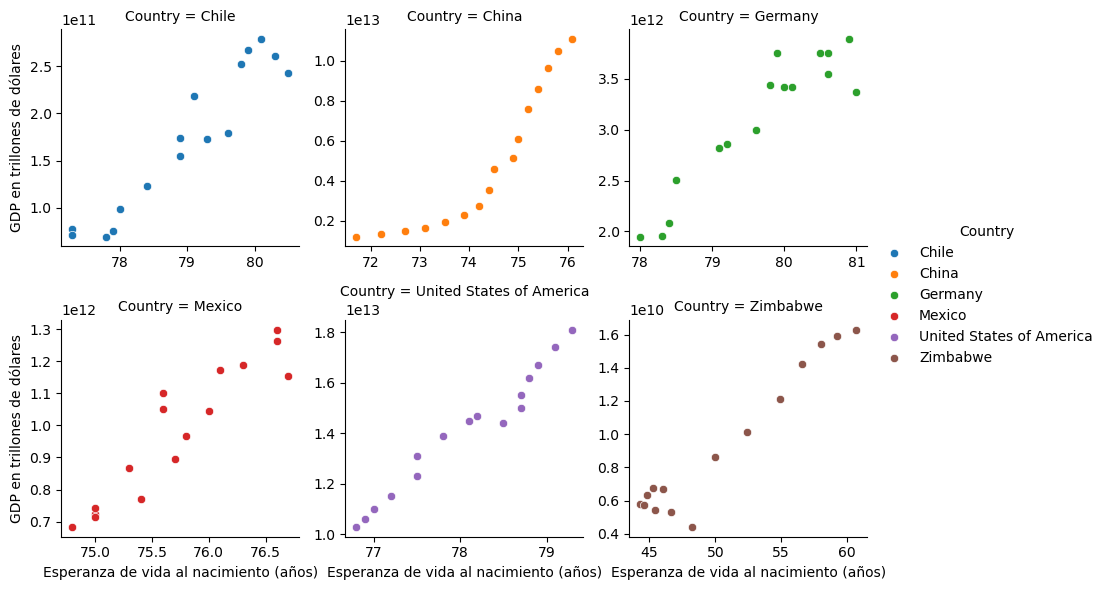

<Figure size 640x480 with 0 Axes>

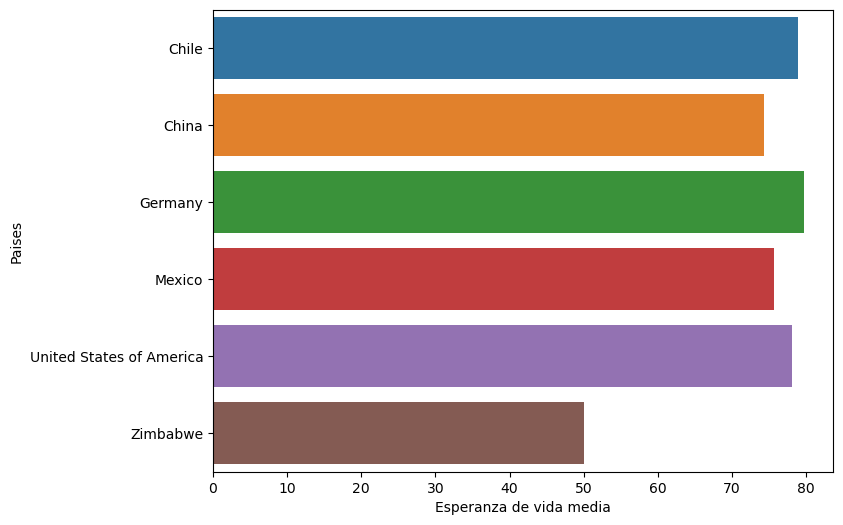

<Figure size 640x480 with 0 Axes>

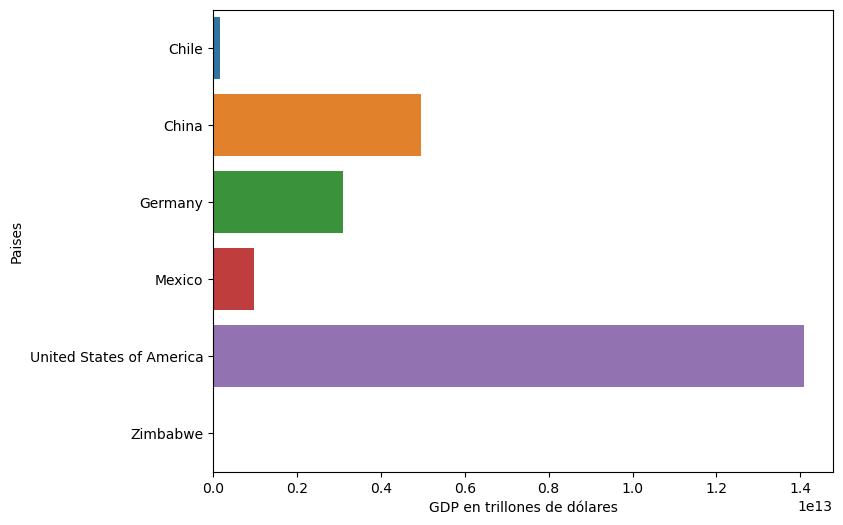

<Figure size 640x480 with 0 Axes>

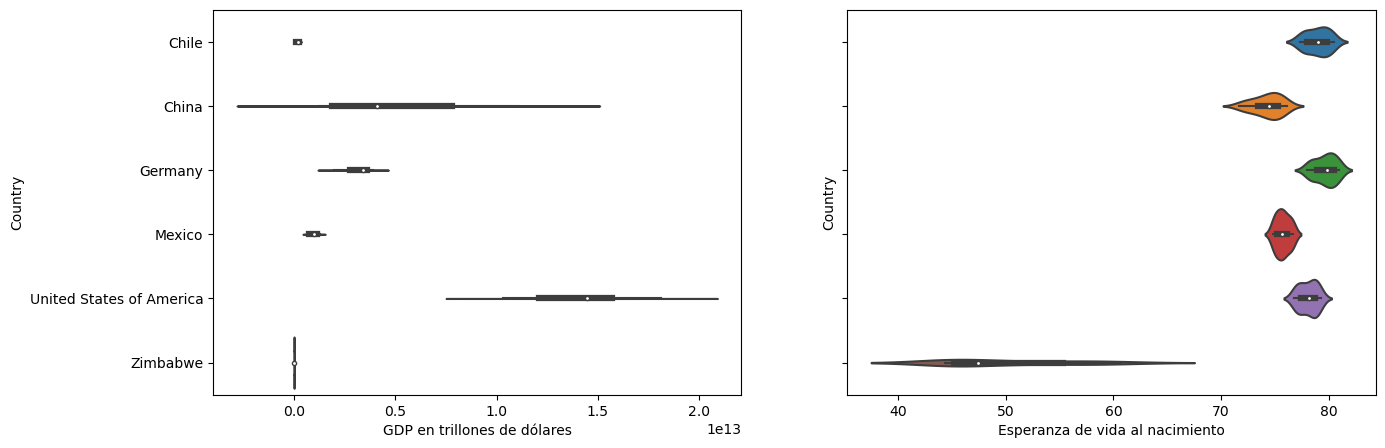

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("all_data.csv")
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")

df_Chile = df[df.Country == "Chile"]
df_China = df[df.Country == "China"]
df_Germany = df[df.Country == "Germany"]
df_Mexico = df[df.Country == "Mexico"]
df_USA = df[df.Country == "United States of America"]
df_Zimbabwe = df[df.Country == "Zimbabwe"]




#print(df.Country.unique())

#Valorar si la esperanza de vida se ha incrementado en las 6 naciones a lo largo del tiempo
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x = "Year", y= "LEABY", hue= "Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Esperanza de vida por años")
plt.show()
plt.clf()

#Respuesta: Sí, se ha incrementado

#Valorar si se ha incrementado el GDP en las 6 naciones a lo largo del tiempo
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x = "Year", y= "GDP", hue= "Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

plt.figure(figsize=(8,6))
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Año","GDP en trillones de dólares"))

graphGDP;
plt.show()
plt.clf()

#Respuesta: Sí, se ha incrementado

#¿Existe correlación entre GDP y esperanza de vida de un país?
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Esperanza de vida al nacimiento (años)", "GDP en trillones de dólares"));
plt.show()
plt.clf()
#Sí, excepto en Zimbabwe

#¿Cuál es la esperanza de vida media en los 6 países?
dfMeans = df.drop(["Year"], axis = 1).groupby("Country").mean().reset_index()
dfMeans

plt.figure(figsize=(8,6))
sns.barplot(dfMeans,x="LEABY",y="Country")
plt.xlabel("Esperanza de vida media")
plt.ylabel("Paises")
plt.show()
plt.clf()

#¿Cuál es el GDP medio en los 6 países?
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP en trillones de dólares");
plt.ylabel("Paises")
plt.show()
plt.clf()

#¿Cuál es la distribución de la esperanza de vida? ¿y del GDP?

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP en trillones de dólares")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Esperanza de vida al nacimiento");
